## Generated new data set with systematics

In [3]:
from LHEImport.LHEImport import LHEImport as LHEI
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use(["science", "grid"])
plt.rcParams.update({"font.family":"serif", "font.size":16, "figure.figsize":[20,10]})

In [2]:
## uncomment this cell to generate the hdf5 files.
# data = LHEI('event_files/ttZ_events_lhapdf_02.lhe')
# data.toHDF5('ttZ_events_02', 'particles_limited', limit_events=True)
# data.toHDF5('ttZ_events_02', 'particles', limit_events=False)

In [3]:
# # generating a big list of all data, can then be imported into a pd.DataFrame
# datalist = []
# for i in range(0, len(Data['eventdata'])):
#     event_particles = Data['eventdata'][i]['final_particles']
#     for particle in event_particles:
#         datalist.append(particle.__dict__)

In [4]:
# df = pd.DataFrame(datalist)

In [4]:
df = pd.read_hdf('event_files/hdf5/ttZ_events_02.h5', 'particles')
# df = pd.read_hdf('event_files/hdf5/ttZ_events_02.h5', 'limit_particles')

## Using scikit-hep/vector testing

In [5]:
import vector

In [6]:
Zs = df.loc[df['pdgid'] ==23]
ts = df.loc[df['pdgid'] ==6]
tbars = df.loc[df['pdgid'] ==-6]

In [7]:
z_vecs=vector.arr({
    'pt':Zs['pt'].values, 
    'phi':Zs['phi'].values, 
    'eta':Zs['eta'].values, 
    'e':Zs['energy'].values
                })
t_vecs=vector.arr({
    'pt':ts['pt'].values, 
    'phi':ts['phi'].values, 
    'eta':ts['eta'].values, 
    'e':ts['energy'].values
                })
tbar_vecs=vector.arr({
    'pt':tbars['pt'].values, 
    'phi':tbars['phi'].values, 
    'eta':tbars['eta'].values, 
    'e':tbars['energy'].values
                })

In [8]:
# for particle, particle_string in zip([z_vecs, t_vecs, tbar_vecs], ['z', 't', 't~']):
def single_fourvecplot(particle, particle_string):
    fig, axes = plt.subplots(2,2)
    for i, index, ax in zip(range(4), ["rho", "phi", "eta", "t"], axes.flatten()):
        ax.hist(particle[index], bins = 50, histtype="step")
        if index == "t":
            ax.title.set_text(f"${particle_string}$ : Energy")
        elif index == "rho":
            ax.title.set_text(f"${particle_string}$ : Energy")
        else:
            ax.title.set_text(f"${particle_string}$ : $\\{index}$")
    plt.show()

In [17]:
# fourvecplot(tbar_vecs, 'tbar')

## Plot of $\rho$, $\phi$, $\eta$ and Energy for each particle.

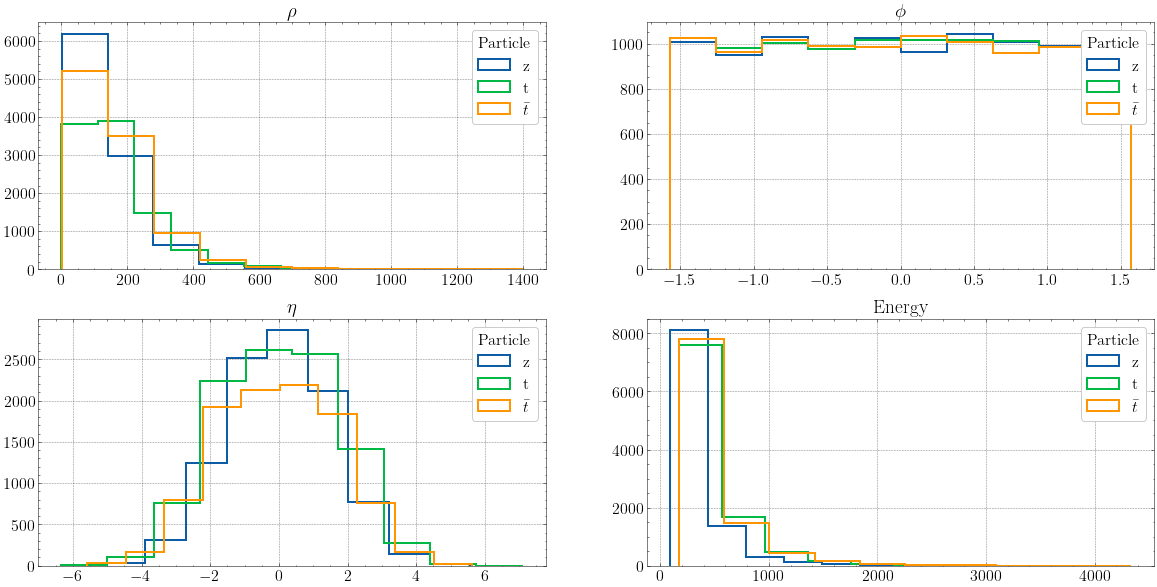

In [9]:
fig, axes = plt.subplots(2,2)
for param, ax in zip(["rho", "phi", "eta","t"], axes.flatten()):
    for particle, particle_string in zip([z_vecs, t_vecs, tbar_vecs], ["z", "t", "$\\bar{t}$"]):
        ax.hist(particle[param], histtype='step', label=f"{particle_string}", linewidth=2)
        ax.legend(title="Particle", loc="upper right")
        if param == 't':
            ax.title.set_text("Energy")
        else:
            ax.title.set_text(f'$\\{param}$')